In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

# 1st Order ODE
Let's solve:
$$ \dot{y}(t) = .5 \cdot  y(t)$$
with the initial condition:
$$ y(t=0)=1 $$ 

In [2]:
y_0 = 1
t_0 = 0
t_f = 10

def dy_dt(y):
    return .5*y

def analytic_solution_1st_order(t):
    return np.exp(.5*t)

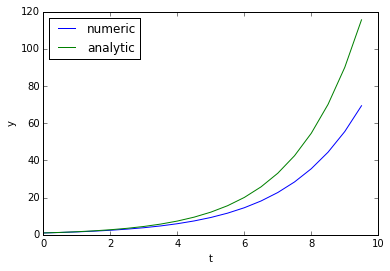

In [3]:
dt = .5

t_array = np.arange(t_0, t_f, dt)
y_array = np.empty_like(t_array)

y_array[0] = y_0

for i in range(len(y_array)-1):
    y_array[i+1] = y_array[i] + (dt * dy_dt(y_array[i]))
    
plt.plot(t_array, y_array, label="numeric")
plt.plot(t_array, analytic_solution_1st_order(t_array), label="analytic")
plt.legend(loc="best")
plt.xlabel("t")
plt.ylabel("y")

## Try smaller timestep

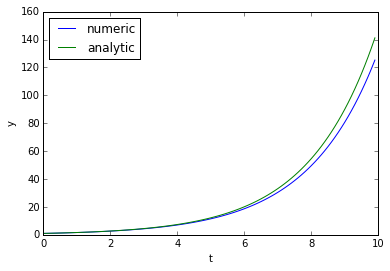

In [4]:
dt = .1

t_array = np.arange(t_0, t_f, dt)
y_array = np.empty_like(t_array)

y_array[0] = y_0

for i in range(len(y_array)-1):
    y_array[i+1] = y_array[i] + (dt * dy_dt(y_array[i]))
    
plt.plot(t_array, y_array, label="numeric")
plt.plot(t_array, analytic_solution_1st_order(t_array), label="analytic")
plt.legend(loc="best")
plt.xlabel("t")
plt.ylabel("y")

Our numeric result is more accurate when we use a smaller timestep, but it's still not perfect

# 2nd Order ODE
Let's solve:
$$ \ddot{y}(t) = - 5  y(t)$$
with the initial condition:
$$ y(t=0)=1 $$ 
$$ \dot{y}(t=0) = 0 $$

To do this we need to convert our 2nd order ODE into two 1st order ODEs. Let's define a new vector:
$$ z \equiv (y, \dot{y}) $$

For this vector, we have its derivative:
$$ \dot{z} = (\dot{y}, - 5 y) $$

In [5]:
y_0 = 1
dy_dt_0 = 0

#which gives us:
z_0 = (y_0, dy_dt_0)

t_0 = 0
t_f = 10

def dz_dt(z):
    y, dy_dt = z #unpack the z vector
    
    return np.array([dy_dt, -5*y])

def analytic_solution_2nd_order(t):
    return np.cos(np.sqrt(5)*t)
        

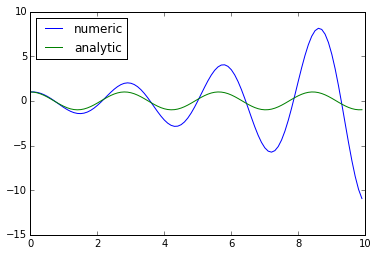

In [6]:
dt = .1
t_array = np.arange(t_0, t_f, dt)

z_list = [z_0]

for i in range(len(t_array)-1):
    z_list.append(z_list[i] + dt*dz_dt(z_list[i]))
z_array = np.array(z_list)

y_array     = z_array[:,0]
dy_dt_array = z_array[:,1]

plt.plot(t_array, y_array, label="numeric")
plt.plot(t_array, analytic_solution_2nd_order(t_array), label="analytic")
plt.legend(loc="best")


## Try again, with a smaller timestep

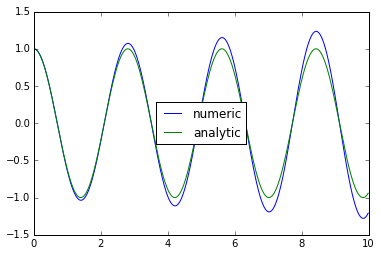

In [7]:
dt = .01
t_array = np.arange(t_0, t_f, dt)

z_list = [z_0]

for i in range(len(t_array)-1):
    z_list.append(z_list[i] + dt*dz_dt(z_list[i]))
z_array = np.array(z_list)

y_array     = z_array[:,0]
dy_dt_array = z_array[:,1]

plt.plot(t_array, y_array, label="numeric")
plt.plot(t_array, analytic_solution_2nd_order(t_array), label="analytic")
plt.legend(loc="best")

Once again, our numeric result is more accurate with a smaller timestep